In [1]:
#import pandas
import pandas as pd
#import numpy
import numpy as np
import itertools

from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install mlxtend

In [3]:
df = pd.read_csv('bank.csv', sep=';')
df.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [4]:
print("bank user data set dimensions : {}".format(df.shape))

bank user data set dimensions : (4521, 17)


In [5]:
# Check for missing or Null Data points
df.isnull().sum()
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
print(df.describe())

               age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000  


In [7]:
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [8]:

from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('bank.csv',sep=';')

# replace“unknown”to NaN to avoid error report
df = df.replace("unknown", np.nan)

# loop all features
for column in df.columns:
    if df[column].isna().any():
        # separate known and unknown
        known = df.dropna(subset=[column])
        unknown = df[df[column].isna()]

        # if unknown
        if not unknown.empty:
            features = known.drop(columns=[column])
            target = known[column]

            # deal with non-nummber features
            features = pd.get_dummies(features)
            unknown_features = pd.get_dummies(unknown.drop(columns=[column]))

            unknown_features = unknown_features.reindex(columns=features.columns, fill_value=0)

            # train
            clf = RandomForestClassifier()
            clf.fit(features, target)

            # predict
            predictions = clf.predict(unknown_features)

            # fill the data back to dataset
            df.loc[df[column].isna(), column] = predictions

print(df)


      age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous 

In [9]:
df.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,other,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,cellular,3,jun,199,4,-1,0,other,no
4,59,blue-collar,married,secondary,no,0,yes,no,cellular,5,may,226,1,-1,0,failure,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,other,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,cellular,14,may,57,2,-1,0,other,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


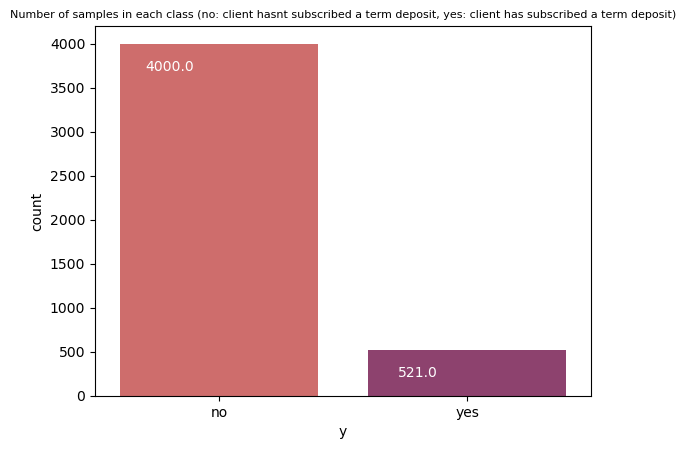

In [10]:
# visualize the class distribution
ax = sns.countplot(x="y", data=df, palette="flare")
ax.set_title('Number of samples in each class (no: client hasn''t subscribed a term deposit, yes: client has subscribed a term deposit)', fontsize=8)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white')
plt.show()

# pre-processing

In [11]:
#encode
label_encoders = {}
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [12]:
print(df.describe())

               age          job      marital    education      default  \
count  4521.000000  4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095     4.352356     1.147755     1.150852     0.016810   
std      10.576211     3.209006     0.599650     0.665376     0.128575   
min      19.000000     0.000000     0.000000     0.000000     0.000000   
25%      33.000000     1.000000     1.000000     1.000000     0.000000   
50%      39.000000     4.000000     1.000000     1.000000     0.000000   
75%      49.000000     7.000000     2.000000     2.000000     0.000000   
max      87.000000    10.000000     2.000000     2.000000     1.000000   

            balance      housing         loan      contact          day  \
count   4521.000000  4521.000000  4521.000000  4521.000000  4521.000000   
mean    1422.657819     0.566025     0.152842     0.066799    15.915284   
std     3009.638142     0.495676     0.359875     0.249702     8.247667   
min    -3313.000000     0.000000 

In [13]:
X = df.iloc[:, 1:15].values 
y = df.iloc[:, 16].values

In [14]:
# scaling the data
sc = StandardScaler()
X = sc.fit_transform(X)
class_names=[0,1]

In [15]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=3)

print("X_train set dimensions : {}".format(X_train.shape))
print("X_test set dimensions : {}".format(X_test.shape))
print("y_train set dimensions : {}".format(y_train.shape))
print("y_test set dimensions : {}".format(y_test.shape))

X_train set dimensions : (3164, 14)
X_test set dimensions : (1357, 14)
y_train set dimensions : (3164,)
y_test set dimensions : (1357,)


# Create the model

In [16]:
#applied stratifiedKfold to help the training data balanced under the unbalanced data
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [17]:
# try all k to find the best one
k_values = range(1, 25)

mean_accuracies = []

for k in k_values:
    mlp = MLPClassifier(hidden_layer_sizes=(k,), random_state=42)
    
    scores = cross_val_score(mlp, X_train, y_train, cv=skf)
    
    mean_accuracies.append(np.mean(scores))

In [18]:
# find best k and print the accuracy
best_k_index = np.argmax(mean_accuracies)
best_k = k_values[best_k_index]
best_accuracy = mean_accuracies[best_k_index]

print("Best number of neurons in the hidden layer:", best_k)
print("Corresponding highest accuracy:", best_accuracy)

Best number of neurons in the hidden layer: 9
Corresponding highest accuracy: 0.889396238469832


In [19]:

k = 9

mlp = MLPClassifier(hidden_layer_sizes=(k,), random_state=42)

# train the data
mlp.fit(X_train, y_train)

# predict
mlp_predict = mlp.predict(X_test)

mlp_predict_proba = mlp.predict_proba(X_test)[:, 1]

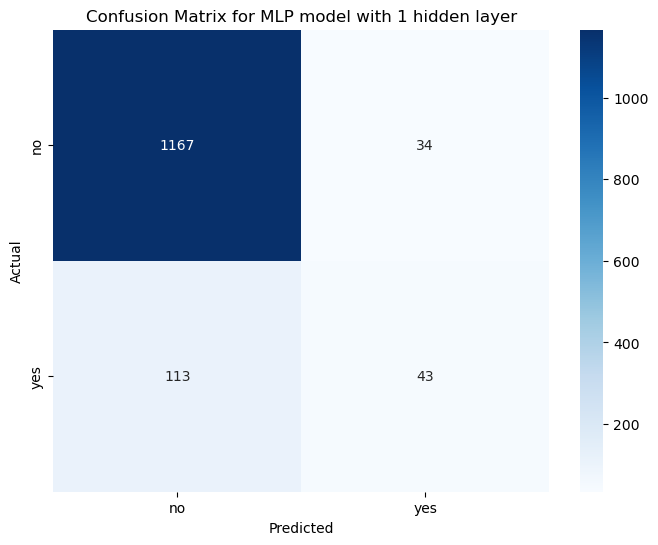

accuracy: 0.8916728076639646
precision: 0.5584415584415584
recall: 0.27564102564102566
F1 score: 0.36909871244635195


In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

best_k = 9  # the best result found earlier

# create the model and train it
mlp_model_1_layer = MLPClassifier(hidden_layer_sizes=(best_k,), random_state=42)
mlp_model_1_layer.fit(X_train, y_train)

# predict using test data
y_pred_mlp_1_layer = mlp_model_1_layer.predict(X_test)

# coculate confusion matrix
conf_matrix_mlp_1_layer = confusion_matrix(y_test, y_pred_mlp_1_layer)

# print out
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_mlp_1_layer, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for MLP model with 1 hidden layer')

plt.xticks(ticks=[0.5, 1.5], labels=['no', 'yes'])
plt.yticks(ticks=[0.5, 1.5], labels=['no', 'yes'])

plt.show()



from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_mlp_1_layer)

precision = precision_score(y_test, y_pred_mlp_1_layer)

recall = recall_score(y_test, y_pred_mlp_1_layer)

f1 = f1_score(y_test, y_pred_mlp_1_layer)

print("accuracy:", accuracy)
print("precision:", precision)
print("recall:", recall)
print("F1 score:", f1)

In [21]:
#test to find best iteration number

iterations = [10, 50, 100, 200, 500, 1000]


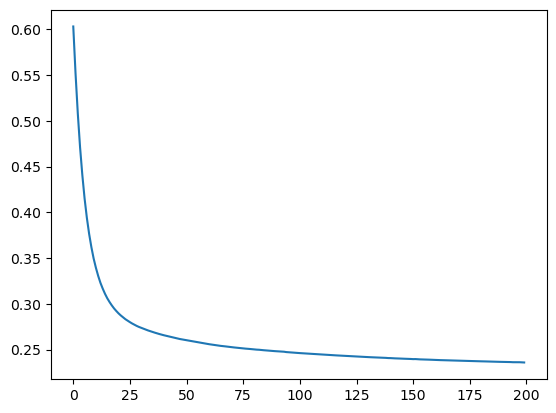

In [22]:
# Adjust the Configuration 
loss_values = mlp.loss_curve_
plt.plot(loss_values)
plt.show()

In [24]:
max_neurons = 25

# Initialize variables to record the highest classification accuracy and corresponding neuron allocation scheme
best_accuracy = 0
best_neurons_allocation = None

# Initialize results list
results = []

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Loop through neuron allocation schemes
for i in range(1, max_neurons):
    accuracies = []
    # Loop through each fold in StratifiedKFold
    for train_index, test_index in skf.split(X_train, y_train):
        # Split the data into train and test sets
        X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
        y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

        # Create Multi-Layer Perceptron model
        mlp = MLPClassifier(hidden_layer_sizes=(i, max_neurons - i), random_state=42)
        
        # Train the model
        mlp.fit(X_train_fold, y_train_fold)
        
        # Make predictions on the test set
        y_pred_fold = mlp.predict(X_test_fold)
        
        # Calculate classification accuracy
        accuracy = accuracy_score(y_test_fold, y_pred_fold)
        accuracies.append(accuracy)
    
    # Calculate the mean accuracy across all folds
    mean_accuracy = np.mean(accuracies)
    
    # Append the results to the list
    results.append(((i, max_neurons - i), mean_accuracy))
    
    # Update the highest classification accuracy and corresponding neuron allocation if the current accuracy is higher
    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_neurons_allocation = (i, max_neurons - i)

# Print the best classification accuracy and corresponding neuron allocation
print("Best accuracy:", best_accuracy)
print("Best neurons allocation:", best_neurons_allocation)

# Convert results to a DataFrame
results_df = pd.DataFrame(results, columns=['Neurons Allocation', 'Mean Accuracy'])

# Print the results table
print(results_df)


Best accuracy: 0.8925558040170906
Best neurons allocation: (3, 22)
   Neurons Allocation  Mean Accuracy
0             (1, 24)       0.884641
1             (2, 23)       0.884641
2             (3, 22)       0.892556
3             (4, 21)       0.885603
4             (5, 20)       0.884650
5             (6, 19)       0.884341
6             (7, 18)       0.882756
7             (8, 17)       0.879913
8             (9, 16)       0.883395
9            (10, 15)       0.886238
10           (11, 14)       0.883710
11           (12, 13)       0.882123
12           (13, 12)       0.880866
13           (14, 11)       0.881497
14           (15, 10)       0.882762
15            (16, 9)       0.883074
16            (17, 8)       0.881170
17            (18, 7)       0.882758
18            (19, 6)       0.879597
19            (20, 5)       0.877387
20            (21, 4)       0.883075
21            (22, 3)       0.881801
22            (23, 2)       0.881817
23            (24, 1)       0.881494


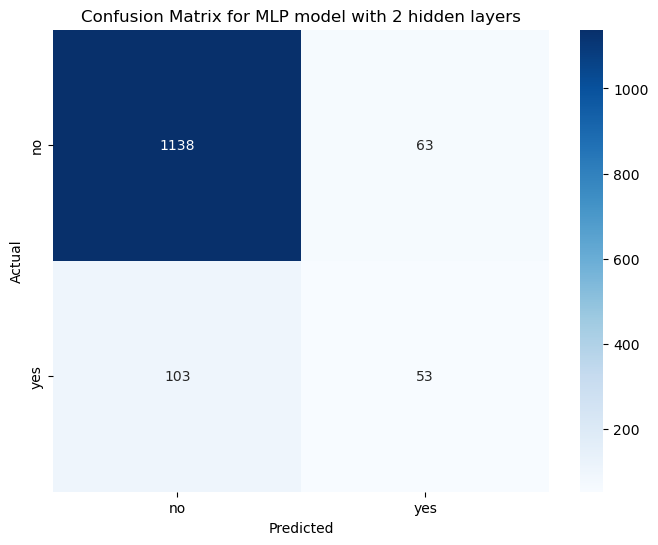

accuracy: 0.8776713338246132
precision: 0.45689655172413796
recall: 0.33974358974358976
F1 score: 0.3897058823529412


In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

best_neurons_allocation = (3, 22)  # the best result found earlier

mlp_model_2_layers = MLPClassifier(hidden_layer_sizes=best_neurons_allocation, random_state=42)
mlp_model_2_layers.fit(X_train, y_train)
y_pred_mlp_2_layers = mlp_model_2_layers.predict(X_test)

# 2. conculate confusion matrix
conf_matrix_mlp_2_layers = confusion_matrix(y_test, y_pred_mlp_2_layers)

# 3. print
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_mlp_2_layers, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for MLP model with 2 hidden layers')

plt.xticks(ticks=[0.5, 1.5], labels=['no', 'yes'])
plt.yticks(ticks=[0.5, 1.5], labels=['no', 'yes'])

plt.show()



accuracy = accuracy_score(y_test, y_pred_mlp_2_layers)

precision = precision_score(y_test, y_pred_mlp_2_layers)

recall = recall_score(y_test, y_pred_mlp_2_layers)

f1 = f1_score(y_test, y_pred_mlp_2_layers)

print("accuracy:", accuracy)
print("precision:", precision)
print("recall:", recall)
print("F1 score:", f1)